In [1]:
from os.path import exists, isfile

import pandas as pd
import numpy as np

from matplotlib.pylab import plt
import seaborn as sns

import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

from nltk.corpus import stopwords
from textblob import Word
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
if not exists("../../datasets/2300_combine_kaggle_datasets.csv"):
    print ("Missing dataset file")
    
df=pd.read_csv("../../datasets/2300_combine_kaggle_datasets.csv")
df.head()

,apple_id,trim_title,apple_title,genre,apple_rating,apple_reviews,apple_size,pegi,normed_apple_rating,google_title,...,log_google_reviews,log_apple_reviews,z_score_google_rating,z_score_apple_rating,z_score_google_sub_apple,norm_google_sub_apple,google_revenue,apple_revenue,log_google_revenue,log_apple_revenue
0,898968647,Call of Duty®,Call of Duty®: Heroes,Games,4.5,179416,201.075195,Teen,0.9,Call of Duty®: Heroes,...,6.205244,5.253861,0.449144,0.638043,-0.188899,-0.02,0.00,0.00,NaN,NaN
1,1147297267,Dont Starve,Don't Starve: Shipwrecked,Games,3.5,495,604.341797,Everyone 10+,0.7,Don't Starve: Shipwrecked,...,3.166726,2.694605,-0.143135,-0.806018,0.662884,0.12,7325.32,2470.05,3.864827,3.392706
2,352670055,F,F-Sim Space Shuttle,Games,4.5,6403,72.855469,Everyone,0.9,F-Sim Space Shuttle,...,3.734560,3.806384,0.449144,0.638043,-0.188899,-0.02,27080.73,31950.97,4.432660,4.504484
3,763692274,Grand Theft Auto,Grand Theft Auto: San Andreas,Games,4.0,32533,1964.965820,Mature 17+,0.8,Grand Theft Auto: San Andreas,...,5.542778,4.512324,0.449144,-0.083987,0.533131,0.08,2439244.38,227405.67,6.387255,5.356801
4,771989093,LEGO® Friends,LEGO® Friends,Games,4.0,400,730.941406,Everyone,0.8,LEGO® Friends,...,2.931458,2.602060,0.449144,-0.083987,0.533131,0.08,4261.46,1996.00,3.629558,3.300161


In [3]:
df.columns.unique()

Index(['apple_id', 'trim_title', 'apple_title', 'genre', 'apple_rating',
       'apple_reviews', 'apple_size', 'pegi', 'normed_apple_rating',
       'google_title', 'google_rating', 'google_reviews', 'google_size',
       'price', 'normed_google_rating', 'log_google_reviews',
       'log_apple_reviews', 'z_score_google_rating', 'z_score_apple_rating',
       'z_score_google_sub_apple', 'norm_google_sub_apple', 'google_revenue',
       'apple_revenue', 'log_google_revenue', 'log_apple_revenue'],
      dtype='object')

In [4]:
prediction_feature = ['apple_rating']

In [5]:
numeric_features = ['google_rating', 'google_reviews'] 

In [6]:
categorical_features= ['genre', 'pegi']
one_hot_encodings = pd.get_dummies(df[categorical_features], drop_first=True)
one_hot_encodings.shape

#linear regression can only take numerical values

(604, 15)

In [7]:
one_hot_encodings.head() #boolean

,genre_Books & Reference,genre_Business,genre_Education,genre_Entertainment,genre_Food & Drink,genre_Games,genre_Health & Fitness,genre_Lifestyle,genre_News,genre_Others,genre_Social Networking,genre_Utilities,pegi_Everyone 10+,pegi_Mature 17+,pegi_Teen
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
df = pd.concat([df, one_hot_encodings], axis=1)
df.shape

(604, 40)

In [9]:
categorical_features = list(one_hot_encodings.columns)

In [10]:
base_features = numeric_features + categorical_features 
data = df[base_features + prediction_feature].copy()
data.isnull().sum() #linear regression wont work with null values

google_rating              0
google_reviews             0
genre_Books & Reference    0
genre_Business             0
genre_Education            0
genre_Entertainment        0
genre_Food & Drink         0
genre_Games                0
genre_Health & Fitness     0
genre_Lifestyle            0
genre_News                 0
genre_Others               0
genre_Social Networking    0
genre_Utilities            0
pegi_Everyone 10+          0
pegi_Mature 17+            0
pegi_Teen                  0
apple_rating               0
dtype: int64

In [11]:
model = LinearRegression().fit(data[base_features], data[prediction_feature])
model.score(data[base_features], data[prediction_feature])

0.3653891389204127

In [12]:
test = data.iloc[0]       
training = data.iloc[1:]  

model = LinearRegression().fit(training[base_features], training[prediction_feature])
model.predict(test[base_features].values.reshape(1, -1)), test[prediction_feature]

(array([[4.3234054]]), apple_rating    4.5
 Name: 0, dtype: float64)

In [13]:
test = data.iloc[[len(data)-1]]    
training = data.iloc[:len(data)-1] 

model = LinearRegression().fit(training[base_features], training[prediction_feature])
model.predict(test[base_features]), test[prediction_feature]

(array([[4.16558923]]),      apple_rating
 603           4.5)

In [14]:
freq = pd.Series(' '.join(df['apple_title']).split()).value_counts()[-5:]
freq

Global      1
Nextdoor    1
iFunny      1
Broadway    1
Soccer      1
dtype: int64

In [15]:
base_scores = cross_val_score(
            model, data[base_features], 
            data[prediction_feature], 
            cv=10,
            scoring='neg_median_absolute_error'
)

base_scores.mean()

-0.2824316354948381

In [16]:
mean_rating_scores = (df['apple_rating']-df['apple_rating'].median()).abs()
mean_rating_scores.mean()

0.43956953642384106

In [17]:
rating_only_scores = cross_val_score(
            model, data[['google_rating']], 
            data[prediction_feature], 
            cv=10,                               
            scoring='neg_median_absolute_error'  
)

rating_only_scores.mean()

-0.29412190792777093

No handles with labels found to put in legend.


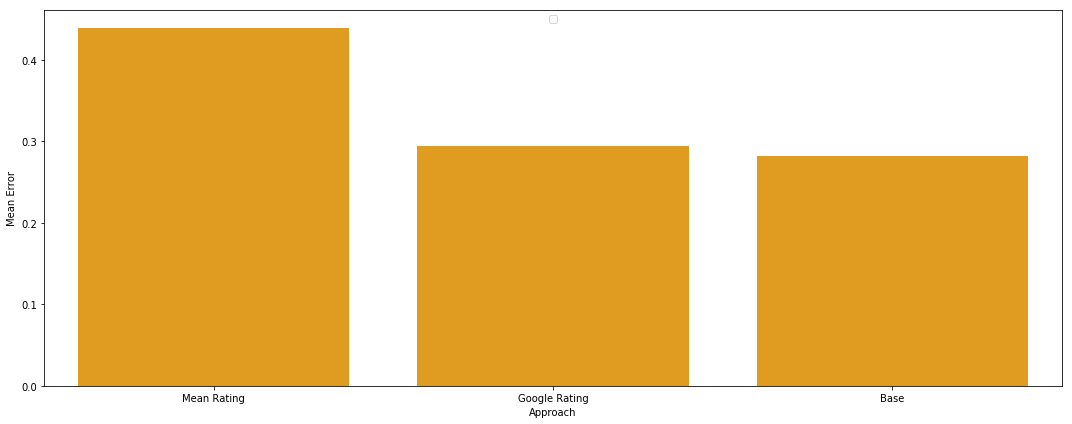

In [18]:
ig, ax = plt.subplots(figsize=(15, 6))

error_scores = np.array([
    mean_rating_scores.mean(), -rating_only_scores.mean(), -base_scores.mean()
])

sns.barplot(
    ['Mean Rating', 'Google Rating', 'Base'],
    error_scores, color='orange', ax=ax)

ax.set_xlabel('Approach')
ax.set_ylabel('Mean Error')
ax.legend(loc='upper center')
plt.tight_layout()

In [19]:
#delete expanded features
X = df[base_features].reset_index(drop=True)
y = df[prediction_feature].reset_index(drop=True)

In [20]:
kf = KFold(n_splits=10)
results = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    model = LinearRegression().fit(X_train, y_train)
    
    X_test['prediction'] = model.predict(X_test)
    X_test['actual'] = y_test

    results.append(X_test)

results_df = pd.concat(results)

In [21]:
results_df['abs_error'] = (results_df['prediction'] - results_df['actual']).abs()

In [22]:
results_df['abs_error'].describe()

count    604.000000
mean       0.381350
std        0.372443
min        0.001286
25%        0.121520
50%        0.269577
75%        0.499094
max        2.668592
Name: abs_error, dtype: float64

In [27]:
results_df.columns.unique()

Index(['google_rating', 'google_reviews', 'genre_Books & Reference',
       'genre_Business', 'genre_Education', 'genre_Entertainment',
       'genre_Food & Drink', 'genre_Games', 'genre_Health & Fitness',
       'genre_Lifestyle', 'genre_News', 'genre_Others',
       'genre_Social Networking', 'genre_Utilities', 'pegi_Everyone 10+',
       'pegi_Mature 17+', 'pegi_Teen', 'prediction', 'actual', 'abs_error'],
      dtype='object')

In [ ]:
#Absolute error is the difference between the predicted rating and the actual rating
#The higher the absolute error is, the worse the prediction is

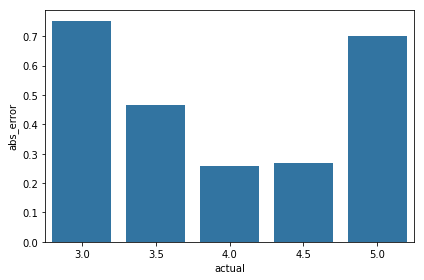

In [34]:
sns.barplot(x="actual", y="abs_error", ci = False, color = 'C0', data=results_df[results_df['actual']>2.5])
plt.tight_layout()
plt.savefig('apple_prediction.png');